# <center>Initiation à la programmation (Python)</center>

# Compter les mots dans un texte

##  0 Nombre de lignes
### Exercice 1
Compter le nombre de lignes dans la version obtenue sur [Gutenberg.org](http://www.gutenberg.org) de [*De l'Origine des Espèces*](http://www.gutenberg.org/ebooks/14158). Il s'agit du fichier DeLOrigine.txt


In [48]:
nLignes=0
texte = open('DeLOrigine.txt')
for ligne in texte:
    nLignes+=1
print(nLignes)

24203


## 1 Première estimation du combre de mots
La définition de ce qu'est un mot n'est pas triviale. Commençons avec une première définition : un mot est une chaîne de caractères délimitée par des espaces et/ou des retours à ligne.
### Exercice 2
Compter le nombre de mots dans *De l'Origine des Espèces* selon cette première définition.


In [49]:
nMots=0
texte = open('DeLOrigine.txt')
for ligne in texte:
    for mot in ligne.split(' '):
        nMots+=1
print(nMots)

220166


Cette première définition du mot, un chaîne de caractères entre deux espaces blancs pose plusieurs problèmes. Lesquels ? 

### Exercice 3
Afin de se faire une idée peut-être plus précise de ces problèmes, construire une liste contenant tous les mots, c'est-à-dire une liste de 220166 éléments. En afficher les élements entre les indices 6000 et 6050. On peut acceder aux éléments d'une liste `l` compris entre les indices `a` et `b` avec :
```python
l[a:b]
```


In [1]:
mots=[]
texte=open('DeLOrigine.txt')
for ligne in texte:
    for mot in ligne.split(' '):
        mots.append(mot)

In [2]:
mots[6000:6050]

['été\n',
 'désappointé;',
 "j'ai",
 'bientôt',
 'reconnu,',
 'en',
 'effet,',
 'que',
 'nos\n',
 'connaissances,',
 'quelque',
 'imparfaites',
 "qu'elles",
 'soient,',
 'sur',
 'les\n',
 'variations',
 'à',
 "l'état",
 'domestique,',
 'nous',
 'fournissent',
 'toujours\n',
 "l'explication",
 'la',
 'plus',
 'simple',
 'et',
 'la',
 'moins',
 'sujette',
 'à',
 'erreur.',
 "Qu'il\n",
 'me',
 'soit',
 'donc',
 'permis',
 "d'ajouter",
 'que,',
 'dans',
 'ma',
 'conviction,',
 'ces',
 'études\n',
 'ont',
 'la',
 'plus',
 'grande',
 'importance']

## 2 Tokeniser un texte
En traitement automatique des langues, discipline à l'intersection d'informatique et de la linguistique, l'opération qui consiste à découper un texte en mots s'appelle l'a tokenisation. D'ailleurs, plutôt que de mots, on parle de **tokens**. Le terme **mot** désigne les entités abstraites qui se réalisent dans les tokens. 

Le texte *le chat dort sur le canapé* compte 6 tokens et 5 mots. Le mot *le* a deux occurrences, les autres une seule.

Un algorithme de tokenisation est une opérationnalisation d'une définition d'un mot. On pourrait construire un tel algorithme, mais d'autres l'ont déjà fait pour nous !

In [3]:
import nltk

L'instruction ci-dessus importe la package (ou librairie ou bibliothèque) nommée [nltk](http://www.nltk.org).  Un package est une collection de 'fonctions' qui étendent les fonctionnalités de Python (le mécanisme existe dans la plupart des langages de programmation).  

Python fournit un certain nombre de [packages par défaut](https://docs.python.org/3/library/index.html), et l'on peut par ailleurs en installer d'[autres](https://pypi.python.org/pypi). Anaconda, la distribution de Python que l'on utilise, installe en même temps que Python [plus 200 autres packages](https://docs.anaconda.com/anaconda/packages/py3.6_win-64), dont nltk. 

Nltk propose plusieurs tokenisers. Nous allons utiliser celui qui s'appelle WordPunctTokenizer, qui prend en compte la ponctuation pour délimiter les mots.

In [4]:
tokenizer = nltk.tokenize.WordPunctTokenizer()
tokenizer.tokenize("le chat dort sur le canapé")

['le', 'chat', 'dort', 'sur', 'le', 'canapé']

### Exercice 4
Tokeniser le texte "Parce qu'aujoud'hui on a cours de Python, c'est la fête !"

In [5]:
tokenizer.tokenize( "Parce qu'aujoud'hui on a cours de Python, c'est la fête !")

['Parce',
 'qu',
 "'",
 'aujoud',
 "'",
 'hui',
 'on',
 'a',
 'cours',
 'de',
 'Python',
 ',',
 'c',
 "'",
 'est',
 'la',
 'fête',
 '!']

### Exercice 5
Compter le nombre de tokens dans *De l'Origine des Espèces*. C'est possible en une seule ligne ! Indice, on peut lire un fichier dans une chaîne de caractères de la manière suivante :
```pytohn
open('nomDuFichier.txt').read()
```


In [6]:
nTokens=0
texte = open('DeLOrigine.txt')
for ligne in texte:
    for token in tokenizer.tokenize(ligne):
        nTokens+=1
print(nTokens)

274971


In [7]:
len(tokenizer.tokenize(open('DeLOrigine.txt').read()))

274971

## Comptage de la fréquence de mots dans un texte

### Exercice 6
A votre avis, combien de fois apparait le mot *le* ? Le mot *livre* ? Combien y a-t-il de mots ?

### Exercice 7
Compter le nombre d'occurrences des mots *le* et *livre*

In [16]:
nOccurrences_le=0
nOccurrences_livre=0
texte = open('DeLOrigine.txt')
for ligne in texte:
    for token in tokenizer.tokenize(ligne):
        if token=='le':
            nOccurrences_le+=1
        if token=='livre':
            nOccurrences_livre+=1
print("Le token 'le' apparait " + str(nOccurrences_le) + " fois")
print("Le token 'livre' apparait " + str(nOccurrences_livre) + " fois")

Le token 'le' apparait 2686 fois
Le token 'livre' apparait 3 fois


### Exercice 8
Construire un dictionnaire qui donne le nombre d'occurrences de chaque mot du texte. 
```python
print(nOccurrences['espèce'])
594
```
Combien y a-t-il de mots dans le texte ?

In [17]:
nOccurrences = {}
texte=open('DeLOrigine.txt')
for mot in tokenizer.tokenize(texte.read()):
    if mot not in nOccurrences:
        nOccurrences[mot]=0
    nOccurrences[mot]+=1

In [18]:
len(nOccurrences)

13337

### Exercice 9
Que fait le programme suivant ?

In [87]:
l=[]
for mot in nOccurrences:
    l.append([nOccurrences[mot],mot])
l.sort()

### Exercice 10
Combien de mots n'apparaissent qu'une seule fois (on appelle ces mots des *hapax*, ou *hapax legomenon*)

In [105]:
print(l[5666])
print(l[5667])

[1, '\ufeff']
[2, ')(']


### Exercice 11
Quel pourcentage de tokens représentent les 10 mots les plus fréquents ?

In [111]:
n=0
for mot in l[-10:]:
    n+=mot[0]
print(n/nTokens)

0.2799677056853268


## Epilogue
Les 10 mots les plus fréquents représentent 28% des tokens. A l'inverse, les 5567 mots les plus rares, qui n'apparaissent qu'une seule fois, représentent 0.02% des tokens. Dit autrement, les 0.0007% de mots les plus fréquents couvrent 28% du texte, tandis que les 42% les plus rares couvrent 0.02% du texte. **Il y a très peu de mots très fréquents, énormément de mots très rares**.

D'une manière générale, dans un texte, si l'on classe les mots du plus fréquent au plus rare, le second est (de l'ordre de) 2 fois moins fréquent que le premier, le 3ème 3 fois moins fréquent que le premier, le 4ème 4 fois moins fréquent que le 1er...

On peut essayer de le vérfier pour l'origine des espèces :

In [ ]:
l=[]
for mot in nOccurrences:
    l.append([nOccurrences[mot],mot])
l.sort(reverse=True) #reverse=True indique qu'il faut trier dans l'ordre décroissant, le mot le plus fréquent en premier
freqObservées=[]
for m in l:
    freqObservées.append(m[0])

In [136]:
freqAttendue=[]
for i in range(1,len(freq)):
    freqAttendue.append(freq[0]/i) #on s'attend a ce que le i-ème mot soit i fois moins fréquent que le premier

In [134]:
import matplotlib.pyplot as plt #matplotlib est une librairie pour tracer des figures ; la ligne suivante indique qu'il faut tracer les figures dans le notebook directement (plutot que dans une autre fenêtre, ou dans un fichier,...)
%matplotlib inline 

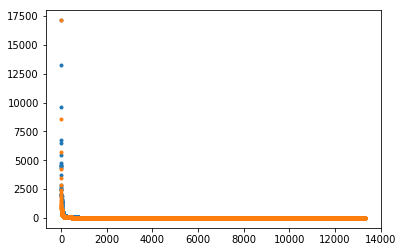

In [135]:
plt.plot(freq,'.')
plt.plot(freqAttendue,'.')

On ne vois pas grand chose ! Les mots les plus fréquents sont de l'ordre de 10000 fois plus fréquents que les plus rares. Ces fortes différence de fréquence, de 1 à 10000, ne sont pas visualisables.

Pour contourner cette difficulté, on utilise des échelles logarithmiques:

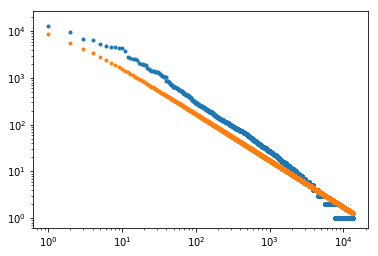

In [137]:
plt.loglog(freq,'.')
plt.loglog(freqAttendue,'.')

La correspondance n'est pas parfaite, l'approximation n'est pas absurde non plus.

La manière dont les fréquences se distribuent s'appelle la [loi de Zipf](https://fr.wikipedia.org/wiki/Loi_de_Zipf), du nom du linguiste qui l'a découverte, George Kingsley Zipf, dans les années 40.